In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/vijayakrishnasunkara/Downloads'

In [3]:
items=pd.read_csv('items.csv')
orders=pd.read_csv('orders.csv')

In [7]:
items

,id,order_id,name,is_veg
0,1,127143465064,Paratha Kuruma,1
1,2,127143465064,Gobi Manchurian Dry,1
2,3,127077028490,Amritsari Paneer Tikka Lasagne,1
3,4,126888939416,Eggless Red Velvet Jar,1
4,5,125668909627,SEV PURI,1
...,...,...,...,...
188,189,1129725726,Triple Choco Chip Thick Shake,1
189,190,1123341565,Cookie and Cream Milkshake,1
190,191,1123287736,Veg Pulao + 3 Phulkas + Dal Fry + Mango Drink ...,1
191,192,1096353194,Cheese Tandoori Veg Pizza Sandwich,1


In [6]:
#unique items
items['name'].nunique()

164

In [9]:
#veg vs non veg
items.groupby('is_veg')['name'].count()

is_veg
0     12
1    180
2      1
Name: name, dtype: int64

In [10]:
# Assuming 'is_veg' is the column representing vegetarian status
unknown_veg_status = items[items['is_veg'] == 2]

# Display the information about the item with unknown 'is_veg' status
print(unknown_veg_status)


    id      order_id          name  is_veg
67  68  103989560561  Oreo Brownie       2


In [11]:
#Creating new column chickenfound
items['chickenfound']=items['name'].str.find('Chicken')

#Checking what is in items 
items

,id,order_id,name,is_veg,chickenfound
0,1,127143465064,Paratha Kuruma,1,-1
1,2,127143465064,Gobi Manchurian Dry,1,-1
2,3,127077028490,Amritsari Paneer Tikka Lasagne,1,-1
3,4,126888939416,Eggless Red Velvet Jar,1,-1
4,5,125668909627,SEV PURI,1,-1
...,...,...,...,...,...
188,189,1129725726,Triple Choco Chip Thick Shake,1,-1
189,190,1123341565,Cookie and Cream Milkshake,1,-1
190,191,1123287736,Veg Pulao + 3 Phulkas + Dal Fry + Mango Drink ...,1,-1
191,192,1096353194,Cheese Tandoori Veg Pizza Sandwich,1,-1


In [12]:
#show chicken items
items['chickenfound']=items['name'].str.find('Chicken')
items[items['chickenfound']!=-1]

,id,order_id,name,is_veg,chickenfound
16,17,118594611361,Chicken Fried Rice + Bbq Shredded Chicken Sauce,0,0
17,18,118594611361,Burnt Garlic Chicken Rice + Chilly Shredded Ch...,0,13
18,19,118594611361,Butter Chicken,0,7
82,83,86796819721,Chicken Schezwan Fried Rice,0,0
84,85,86796243798,Chicken Parcel,0,0
85,86,86796243798,Chicken Sausage,0,0
105,106,63528835993,Peri Peri Chicken with Egg Corn Rice,0,10
148,149,43875533945,Chicken Fried Rice,0,0
149,150,43875533945,Dragon Chicken,0,7
170,171,20698577867,Crunchy Chicken,0,8


In [17]:
# Filtering items for vegetarian items
veg_items = items[items['is_veg'] == 1]

# Grouping by 'name' and aggregating the count of orders for each item
veg_orders_count = veg_items.groupby('name')['order_id'].nunique().reset_index()

# Renaming the columns for clarity
veg_orders_count.columns = ['name', 'order_count']

# Displaying the count of orders for each vegetarian item
print(veg_orders_count)


                                                  name  order_count
0                                              Alfredo            1
1                        Aloo Paratha With Dal Makhani            1
2                         Aloo Sakh with Poori (3 Nos)            1
3                        American Cheese Supreme - Veg            1
4                       Amritsari Paneer Tikka Lasagne            1
..                                                 ...          ...
146                                            Uttapam            1
147                                        Veg Nuggets            1
148  Veg Pulao + 3 Phulkas + Dal Fry + Mango Drink ...            1
149                               Veg Pulao with Raita            1
150                                         Veg Zinger            1

[151 rows x 2 columns]


In [21]:
# Filtering to show vegetarian items ordered twice or more
veg_items_ordered_twice_or_more = veg_orders_count[veg_orders_count['order_count'] >= 2]

# Sorting vegetarian items ordered twice or more in descending order
veg_items_ordered_twice_or_more = veg_items_ordered_twice_or_more.sort_values(by='order_count', ascending=False)

# Displaying vegetarian items ordered twice or more in descending order
print(veg_items_ordered_twice_or_more)


                                        name  order_count
39                      Classic Mac & Cheese            4
61                           Gobi Manchurian            3
103   Paneer Butter Masala with Mattar Pulao            3
99                       Paneer & corn Pasta            3
29                          Cheese corn Wrap            3
5             Awadhi Paneer with Matar Pulao            2
98                            Paneer & Onion            2
144                  Triple Chocolate Waffle            2
119                             Poori Masala            2
115                                   Phulka            2
105                             Paneer Pulao            2
100  Paneer 65 with Chilli Garlic Fried Rice            2
88                                      Naan            2
90   Nawabi Paneer Lababdar with Matar Pulao            2
78                             Masala Kulcha            2
72                Kitkat Oreo Shake [300 ml]            2
69            

In [18]:
#items ordered most times
itemnew=items.groupby('name')['id'].count().reset_index()
itemnew.sort_values(by=['id'],ascending=False)

,name,id
46,Classic Mac & Cheese,4
114,Paneer Butter Masala with Mattar Pulao,3
31,Cheese corn Wrap,3
110,Paneer & corn Pasta,3
70,Gobi Manchurian,3
...,...,...
56,Desi Dal Tadka with Jeera Rice,1
57,Double Chocolate Mousse,1
58,Dragon Chicken,1
60,Everyday Value 2 Reg Classic Paneer Combo,1


In [22]:
#count of distinct orders
orders['order_id'].nunique()


95

In [24]:
#count of unique restaurants
orders['restaurant_name'].nunique()

49

In [25]:
#unique restaurant names
orders['restaurant_name'].unique()

array(['A2B Veg', 'Firangi Bake', 'The Table', 'Sree gupta bhavan',
       'Idlies', "Shyam's Bombay Halwa House", 'The Bowl Company',
       'Super Munch', "Mansukh's Sweets and Snacks", 'KFC',
       'The Chopstix- Kk Nagar', 'Sabarees Veg Restaurant', 'Lassi House',
       'Subway', 'Faasos', "McDonald's", 'LunchBox', 'Drunken Monkey',
       "Sangeetha's Desi Mane", 'The Sandwich Shop 2.0',
       'The Belgian Waffle Co.', 'The Thickshake Factory',
       "Amelie's Cafe & Creamery", 'Kamakshi Mess',
       'Bakya Veg Restaurant', 'Roll Over', "Domino's Pizza",
       'Moonlight Takeaway & Delivery', 'Richy Rich Ice Creams',
       'HOTEL ANANDHA BHAVAN (Imperial Road)', 'VEJ', 'Frozen Bottle',
       'Good For One', 'KEVENTERS', 'The Good Bowl', 'Cream and Fudge',
       'Food Track', 'The Belgian Waffle Co', 'Oh so Stoned', 'Pizza Hut',
       "Desi Rasoi's Punjabi Dhaba", 'Taco Bell', 'Tibbs Frankie',
       'Maggevala Curly Cravings', 'Ibaco', 'The Thick Shake Factory',
       '

In [28]:
#restaurant with most orders overall rank
ordernew=orders.groupby('restaurant_name')['order_id'].nunique().reset_index()
ordernew['Rank']=ordernew['order_id'].rank(method='first',ascending=False)
ordernew.sort_values(by=['order_id'],ascending=False)

,restaurant_name,order_id,Rank
39,The Bowl Company,12,1.0
22,Mansukh's Sweets and Snacks,6,2.0
10,Food Track,5,3.0
0,A2B Veg,4,4.0
44,The Table,4,7.0
5,Domino's Pizza,4,5.0
31,Sangeetha's Desi Mane,4,6.0
20,LunchBox,2,12.0
46,The Thickshake Factory,2,21.0
38,The Belgian Waffle Co.,2,20.0


In [29]:
# revenue change from 2020 to 2021
orders['order_time']=orders['order_time'].apply(pd.to_datetime)
orders['Year']=orders['order_time'].dt.year
orders

,id,order_id,order_total,restaurant_name,order_time,rain_mode,on_time,Year
0,1,127143465064,463.0,A2B Veg,2022-02-05 19:07:45,0,1,2022
1,2,127077028490,252.0,Firangi Bake,2022-02-05 00:40:28,0,1,2022
2,3,126888939416,190.0,The Table,2022-02-02 20:25:40,0,1,2022
3,4,125668909627,258.0,Sree gupta bhavan,2022-01-19 17:31:50,0,0,2022
4,5,125301846779,194.0,Idlies,2022-01-15 11:34:07,0,1,2022
...,...,...,...,...,...,...,...,...
90,91,1161151700,313.0,Domino's Pizza,2018-04-06 19:05:59,0,0,2018
91,92,1129725726,192.0,The Thick Shake Factory,2018-01-07 17:12:33,0,1,2018
92,93,1123341565,125.0,Food Centralis,2017-12-10 20:51:31,0,1,2017
93,94,1123287736,209.0,Rice n Spice,2017-12-10 19:24:06,0,0,2017


In [31]:
orders2=orders.groupby('Year')['order_total'].sum().reset_index()
orders2

,Year,order_total
0,2017,474.0
1,2018,3436.0
2,2019,7484.0
3,2020,3442.0
4,2021,11343.0
5,2022,1677.0


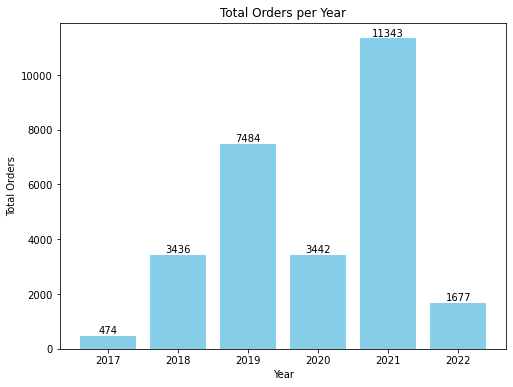

In [34]:
import matplotlib.pyplot as plt

# Assuming 'Year' is the column representing years and 'order_total' is the total order amount
plt.figure(figsize=(8, 6))
bars = plt.bar(orders2['Year'], orders2['order_total'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.title('Total Orders per Year')
plt.xticks(orders2['Year'])  # Set x-axis ticks to match years

# Adding text annotations above each bar
for bar, value in zip(bars, orders2['order_total']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(value)), ha='center', va='bottom')

plt.show()



In [35]:
orders2['previoussales']=orders2['order_total'].shift(1)
orders2['%diff']=(orders2['order_total']-orders2['previoussales'])/orders2['previoussales']
orders2

,Year,order_total,previoussales,%diff
0,2017,474.0,NaN,NaN
1,2018,3436.0,474.0,6.248945
2,2019,7484.0,3436.0,1.178114
3,2020,3442.0,7484.0,-0.540086
4,2021,11343.0,3442.0,2.295468
5,2022,1677.0,11343.0,-0.852156


posx and posy should be finite values
posx and posy should be finite values


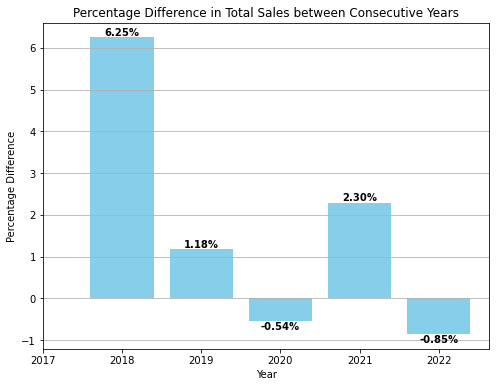

In [42]:
import matplotlib.pyplot as plt

# Plotting the percentage difference in total sales between consecutive years using a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(orders2['Year'], orders2['%diff'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Percentage Difference')
plt.title('Percentage Difference in Total Sales between Consecutive Years')
plt.xticks(orders2['Year'])  # Set x-axis ticks to match years

# Adding text annotations above each bar with bold text and %
for bar, diff in zip(bars, orders2['%diff']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{diff:.2f}%", ha='center', va='bottom' if diff > 0 else 'top', fontweight='bold')

plt.grid(axis='y')
plt.show()
